## **Gaussian Mixture Models(GMM)**

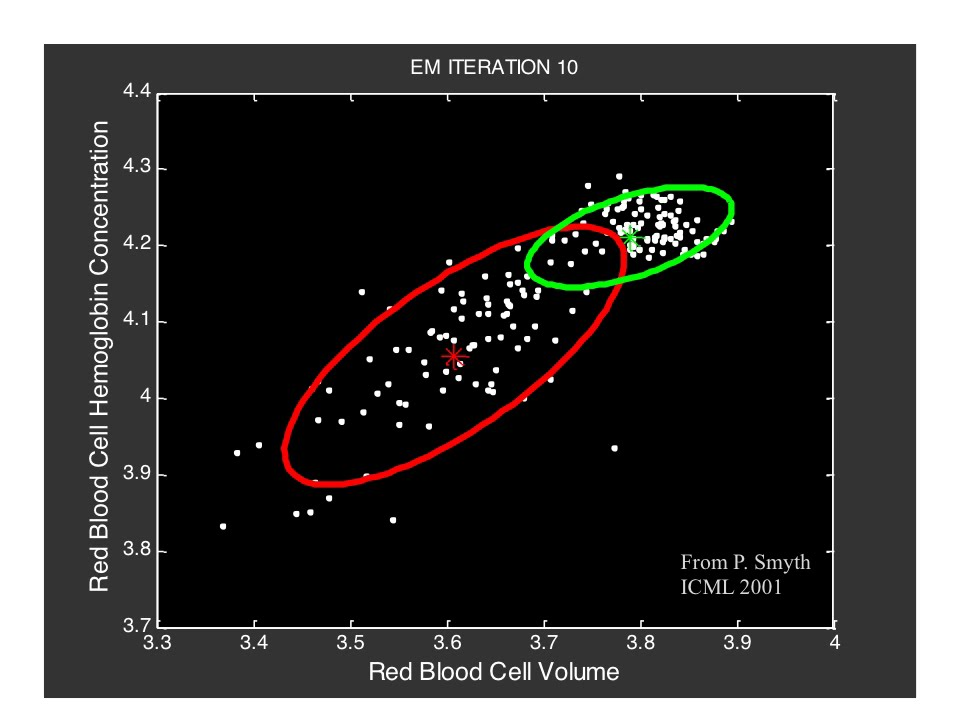

## **GMM Algorithm & Implementation**

$\begin{aligned}S=\left\{x^{(1)}, x^{(2)}, \ldots, x^{(n)}\right\} \\ & z^{(i)} \sim \text { Multinomial }(\phi) \\ & \phi_j \geq 0, \sum_{j=1}^k \phi_j=1 \\ & \phi_j=P\left(z^{(i)}=j\right) \\ & P(x^{(i)} \mid z^{(i)}=j) \sim N\left(\mu_j, \Sigma_j\right) \\ & z^{(i)}-\text { Latent Variable (Unobserved)}\end{aligned}$

## **`Objective Function of Guassian Mixture Models`**

$\begin{gathered}\quad\ Log\ Likelihood\ =\ log P(x ; \phi, \mu, \Sigma) \\\\ =l(\mu, \Sigma, \phi) \\\\ =\sum_{i=1}^n\log \sum_z p(x_i, z ; \phi, \mu, \Sigma)\end{gathered}$

$where\begin{gathered}z \text { - latent variable (unobserved)} \\ P(z) \text { - Class Prior} \\ P(x, z) \text { - model } \\ P(z \mid x) \text { - posterior } \\ P(x) \text { - Evidence }\end{gathered}$

# **`Algorithm`**

There are two steps involved in GMM Algorithm:
1. Expectation
2. Maximization


Lets see what both these steps do.

##  

##  

##  

##  

##  

##  

##  

##  

##  

##  


## **`Inspired by K-Means`**   
## **`Randomly initialize`** $\mu, \Sigma\ and\ \phi = (1/\#clusters)$
## **`Repeat until convergence :-`**
E-Step (Expectation) For each $i, j$ set $(i^{th} data point, j^{th} cluster)$:
$$
\omega_j^{(i)}:=P\left(z^{(i)}=j \mid x^{(i)} ; \phi, \mu, \Sigma\right) \\
where\ P(z \mid x)=\frac{\overbrace{p(x \mid z)}^{\text {Gaussian }} \overbrace{p(z)}^{\text {multinomial }}}{\sum_z p(x \mid z) \cdot P(z)}\\ (Baye's\ Theorem)\\
 where\ p(x \mid z)\ =\ \left\{\begin{array}{l}\frac{1}{\sigma \sqrt{2 \pi}} \exp \left(\frac{-1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)\ \ \ \text {-
Univariate Normal Distribution} \\ \frac{\exp \left(\frac{-1}{2}(x-\mu)^{\top} \Sigma^{-1}(x-\mu)\right)}{\sqrt{(2 \pi)^d|\Sigma|}}\ \ \ \ \ \ \ \text {-Multivariate Normal Distribution}\end{array}\right. $$


M-Step (Maximization) Update Parameters:
$$
\begin{aligned}
& \phi_j=\frac{1}{n} \sum_{i=1}^n w_j^{(i)} \\
& \mu_j=\frac{\sum_{i=1}^n w_j^{(i)} x^{(i)}}{\sum_{i=1}^n w_j^{(i)}} \\
& \sum_j=\frac{\sum_{i=1}^n \omega_j^{(i)}\left(x^{(i)}-\mu_j\right)\left(x^{(i)}-\mu_j\right)^{\top}}{\left(\sum_{i=1}^n w_j^{(i)}\right)}
\end{aligned} $$
$where\\
\phi_j = class\ prior\ (class\ weight)\ of\ j^{th}\ cluster\\
\mu_j = mean\ vector\ of\ j^{th}\ Gaussian\ Distribution\ (cluster)\\
\sum_j = covariance\ matrix\ of\ j^{th}\ Gaussian\ Distribution\ (cluster)$

where $p(x \mid z)=\left\{\begin{array}{l}\frac{1}{\sigma \sqrt{2 \pi}} \exp \left(\frac{-1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)\ \ \ \text {-
Univariate } \\ \frac{\exp \left(\frac{-1}{2}(x-\mu)^{\top} \Sigma^{-1}(x-\mu)\right)}{\sqrt{(2 \pi)^d|\Sigma|}}\ \ \ \ \ \ \ \text {-Multivariate }\end{array}\right.$

##                               

# **`We can also do outlier detection using Gaussian Mixture Models (GMM)`**
### Gaussian Mixture defined the likelihood of a datapoint given distribution as $\sum_{j=1}^k P\left(C_i=j\right) P\left(\mathbf{X}_i \mid C_i=j\right)$ where
- ### $P\left(C_i=j\right)$ is the probability of ith cluster or distribution (class prior) which ($C_i$) is latent variable here as it is not observed.
- ### $P\left(\mathbf{X}_i \mid C_i=j\right)$ is Probability of the datapoint given ith distribution or cluster.
### Sklearn implementation of GMM gives us a method called **`score_samples`** which returns the log likelihood of each datapoint on which we can set a threshold such as every data point having log likelihood less than 5th percentile should be an outlier

#### **Takeaways from GMMs:**

- One thing to note is that, while GMM may sound tempting, it performs quite similar to K-Means, and people end up using K-Means instead.

- It is less used because Hard GMM is same as K-Means.

- They also make a strong assumption that the data is generated with Mixture of Gaussian Distributions, which may not be True always.

##  

##  

##  

##  

##  

##  

##  

## **`Gaussian Mixture Models (GMM) from scratch`**

In [ ]:
class my_GMM:

  @classmethod
  def check_random_state(cls, random_state):
    from sklearn.utils import check_random_state
    return check_random_state(random_state)

  @classmethod
  def sample_without_replacement(cls, n_population, n_samples, random_state_):
    from sklearn.utils.random import sample_without_replacement
    return sample_without_replacement(n_population = n_population, n_samples = n_samples, random_state = random_state_)


  def __init__(self, n_components = 1, max_iter = 100, n_init = 10, init = 'random', cov = [], weights_init = [], random_state = 1, warm_state = False):
    import numpy as np
    import warnings
    if init not in {'random', 'random_from_data', 'k-means++'} and type(init) != np.ndarray and type(init) != list:
      raise Exception('The argument for initialization method i.e. init must be either "random",\
       "random_from_data", "k-means++" or an array of cluster means of shape (n_components, n_features)')
    elif init in {'random', 'random_from_data', 'k-means++'}:
      self.n_components = n_components
      self.n_init = n_init
    else:
      self.init = np.array(self.init)
      self.n_components = (self.init).shape[0]
      if len(weights_init) == 0:
        warnings.warn(f"Warning: Class weights will be initiated uniformly\
         i.e. (1/n_components) = {1/self.n_components} as no weights were passed as argument")
      else:
        if weights_init.shape != (self.n_components, ):
          raise Exception(f"The shape of class weights array i.e. weights_init\
           must be (n_components, ) i.e. {(n_components, )}")
        if len(cov) == 0:
          warnings.warn(f"Warning: Covariance matrix for the clusters will be\
           chosen at random as no argument was passed")
        else:
          if cov.shape[0] != n_components:
            raise Exception("The number of covariance matrices should be equal to n_components")
          else:
            for cov_matrix in cov:
              a, b = cov_matrix.shape
              if a != self.n_components or b != self.n_components:
                raise Exception("All covariance matrices should be square matrices of shape (n_components, n_components)")
              for i in range(a):
                for j in range(b):
                  if cov_matrix[i, j] != cov_matrix[j, i]:
                    raise Exception("All covariance matrices should be symmetric")
                  if i == j and cov_matrix[i, j] < 0:
                    raise Exception("All the diagonal elements in a covariance matrix should be positive")

        if n_init > 1:
          warnings.warn("Warning: Setting number of initializations i.e. 'n_init' to 1 as cluster means were passed as argument")
        self.n_init = 1

    self.init = init
    self.max_iter = max_iter
    self.weights_init = weights_init
    self.cov = cov
    self.random_state = random_state
    self.warm_state = warm_state




























































  def fit(self, X):
    import numpy as np
    from scipy.stats import multivariate_normal
    n, d = X.shape
    random_state = self.check_random_state(self.random_state)

    for iter_ in range(self.n_init):
      if (not self.warm_state) or ('means_' not in dir(self)):
        if self.init == 'random':
          cluster_means = np.random.rand(self.n_components, d)
          cluster_covariances = np.random.rand(self.n_components, d, d)
          for i, cov in enumerate(cluster_covariances):
            cluster_covariances[i] = np.matmul(cov, (cov.T))

        elif self.init == 'random_from_data':
          cluster_mean_indexes = my_GMM.sample_without_replacement(n_population = n, n_samples = self.n_components, random_state_ = random_state)
          cluster_means = X[cluster_mean_indexes]
          cluster_covariances = np.random.rand(self.n_components, d, d)
          for i, cov in enumerate(cluster_covariances):
            cluster_covariances[i] = np.matmul(cov, (cov.T))

        elif self.init == 'k-means++':
          cluster_mean_indexes = my_GMM.sample_without_replacement(n_population = n, n_samples = 1, random_state_ = random_state)
          cluster_means = X[cluster_mean_indexes, :]
          while len(cluster_mean_indexes) < self.n_components:
            nearest_cluster_mean_dist_sq = np.array([])
            for i, pt in enumerate(X):
              cluster_mean_dist_sq = np.sum((pt - cluster_means) ** 2, axis = 1)
              min_cluster_mean_dist_sq = min(cluster_mean_dist_sq)
              nearest_cluster_mean_dist_sq = np.append(nearest_cluster_mean_dist_sq, min_cluster_mean_dist_sq)
            cluster_mean_probas = nearest_cluster_mean_dist_sq/np.sum(nearest_cluster_mean_dist_sq)
            next_cluster_mean_index = np.random.choice(range(n), p = cluster_mean_probas)
            next_cluster_mean = X[[next_cluster_mean_index]]
            while next_cluster_mean_index in cluster_mean_indexes:
              random_prob = np.random.rand()
              next_cluster_mean_index = np.random.choice(range(n), p = cluster_mean_probas)
              next_cluster_mean = X[[next_cluster_mean_index]]

            cluster_mean_indexes = np.append(cluster_mean_indexes, next_cluster_mean_index)
            cluster_means = np.vstack((cluster_means, next_cluster_mean))
            cluster_covariances = np.random.rand(self.n_components, d, d)
            for i, cov in enumerate(cluster_covariances):
              cluster_covariances[i] = np.matmul(cov, (cov.T))
        else:
          cluster_means = self.init
          if len(self.cov) == 0:
            cluster_covariances = np.random.rand(self.n_components, d, d)
            for i, cov in enumerate(cluster_covariances):
              cluster_covariances[i] = np.matmul(cov, (cov.T))
          else:
            cluster_covariances = self.cov

        if len(self.weights_init) == 0:
          class_priors = np.ones(self.n_components, dtype = 'float64')/(self.n_components)
        else:
          class_priors = (np.array(self.weights_init, dtype = 'float64'))/(np.sum(self.weights_init))

        final_cluster_means = None
        final_cluster_cov = None
        final_class_priors = None
        max_likelihood = -np.inf
      else:
        final_cluster_means = self.means_
        final_cluster_cov = self.covariances_
        final_class_priors = self.weights_
        max_likelihood = self.joint_likelihood

      for i in range(self.max_iter):
        norm_dists = [multivariate_normal(mean = cluster_means[j, :], cov = cluster_covariances[j, :, :], allow_singular = True) for j in range(self.n_components)]
        norm_dist_probas = np.array([[norm_dist.pdf(x) for norm_dist in norm_dists] for x in X], dtype = 'float64')
        # Expectation Step
        evidence = np.sum(norm_dist_probas * class_priors, axis = 1).reshape(-1, 1)
        posterior = (norm_dist_probas * class_priors) / evidence
        # Maximization Step
        class_priors = np.mean(posterior, axis = 0)
        cluster_means = np.array([np.average(a = X, weights = posterior[:, j], axis = 0) for j in range(self.n_components)])
        cluster_covariances = np.array([np.cov(m = X, aweights = posterior[:, j], rowvar = False, bias = True) for j in range(self.n_components)])

      joint_likelihood = np.prod(evidence)
      if joint_likelihood > max_likelihood:
        max_likelihood = joint_likelihood
        final_cluster_means = cluster_means
        final_cluster_cov = cluster_covariances
        final_class_priors = class_priors
    self.weights_ = final_class_priors
    self.means_ = cluster_means
    self.covariances_ = cluster_covariances
    self.joint_likelihood = max_likelihood


  def predict_proba(self, X):
    import numpy as np
    from scipy.stats import multivariate_normal
    if 'means_' not in dir(self):
      raise Exception("The model has not been fit on the data yet")
    else:
      norm_dist_probas = np.array([[multivariate_normal(mean = self.means_[i], cov = self.covariances_[i]).pdf(x) for i in range(self.n_components)] for x in X],
                                  dtype = 'float64')
      evidence = np.sum(norm_dist_probas * self.weights_, axis = 1).reshape(-1, 1)
      posterior = (norm_dist_probas * self.weights_) / evidence
      return posterior


  def predict(self, X):
    import numpy as np
    from scipy.stats import multivariate_normal
    if 'means_' not in dir(self):
      raise Exception("The model has not been fit on the data yet")
    else:
      posterior = self.predict_proba(X)
      return np.argmax(posterior, axis = 1)






  def fit_predict(self, X):
    self.fit(X)
    return self.predict(X)







  def score_samples(self, X):
    import numpy as np
    from scipy.stats import multivariate_normal
    if 'means_' not in dir(self):
      raise Exception("The model has not been fit on the data yet")
    else:
      norm_dist_probas = np.array([[multivariate_normal(mean = self.means_[i], cov = self.covariances_[i]).pdf(x) for i in range(self.n_components)] for x in X],
                                  dtype = 'float64')
      likelihoods = np.sum(norm_dist_probas * self.weights_, axis = 1)
      return np.log(likelihoods)

## **`Extra Learning Resources:`**

1. https://www.youtube.com/watch?v=ZZGTuAkF-Hw&t=2108s (Best explaination by Anand Avati - Stanford)

2. https://www.youtube.com/watch?v=LmpkKwsyQj4&t=4155s (Best explaination by Andrew NG - Stanford)


